## INTRODUCTION:
### Insights Into The Housing Market Dynamics in Kings County, USA

### Overview
The housing market of Kings County, Northwest USA, is a dynamic market that has a lot of factors influencing house pricing. Understanding how and to what extent these factors impact pricing is really important for homeowners, real estate agencies, and other stakeholders.

This project aims to analyze housing sales data from King County, Northwest USA, employing multiple linear regression modeling. The objective is to derive meaningful insights for homeowners, real estate agencies, and other stakeholders about the factors influencing house prices, with the goal of making data-driven recommendations.


### Problem Statement

This project aims to conduct a thorough analysis of house sales data in King County, Northwest USA, utilizing multiple linear regression modeling techniques. The primary goal is to uncover insights into the factors influencing house prices in the region and offer data-driven recommendations for homeowners, real estate agencies, and other stakeholders.




### Stake Holders

This project targets a diverse audience:

- **Homeowners**: Individuals aiming to increase property value through informed decisions on renovations and enhancements.

- **Real Estate Agencies**:  Companies and agents seeking data-driven insights to facilitate effective home buying and selling for their clients.

## Objectives:

1. **Explore the Relationship Between the Square Footage of the Home and Housing Prices:**
   - Investigate on how the size of the house impacts the housing prices, how significant is the correlation between living area size to price compared to the other independent variables.

2. **Assess the Impact of Rennovations on the Housing Price:**
   - Analyze the impact of house upgrades to the sales price. How does renovated houses compare to non-renovated house when other independent variables are constant. 

3. **Develop a Linear Regression Model to Predict Housing Prices:**
   - Build and evaluate a linear regression model using the best features to predict house prices (`price`). Provide stakeholders with a predictive tool for estimating housing prices in Kings County.

## Business Understanding
This project addresses the core business challenge within the King County, Northwest USA real estate market. Key stakeholders such as homeowners and real estate agencies are focused on gaining insights into the factors that impact house prices, enabling them to make informed, data-driven decisions in this dynamic market.

## Data Understanding
We used data sourced from King County Housing Dataset CSV. The data represents houses with information on price, bedrooms, bathrooms, sqft living, sqft lot, floors, view, aqnd year built. Total data used was from 21597 homes split 80/20 for training and testing.



### Exploratory Data Analysis

#### Library Imports

In [91]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from statsmodels.formula.api import ols

#### Load the Kings County Housing Dataset.

In [92]:
# Load the data into a dataframe and read the first five rows
df = pd.read_csv('./data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


#### Column/Feature Description

In [93]:
# Read the columns in the dataset
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### Column Names and descriptions for Kings County Data Set
* **id** - unique identity for a house
* **date** - Date house was sold
* **price** -  Price prediction target
* **bedrooms** - Number of Bedrooms/House
* **bathrooms** - Number of bathrooms/bedrooms
* **sqft_living** - square footage of the home
* **sqft_lot** - square footage of the lot
* **floors** - Total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [94]:
# Gets the number of rows and columns in the KC dataset
df.shape

(21597, 21)

Dataset has 21597 rows and 21 columns

Gives a description of the numeric columns in the dataset.

In [95]:
# Numeric description of the columns
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Check the data type held by each column and number of non-null values

In [96]:
# Check the data type held by each column and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Check the null values in each column

In [97]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Waterfront has 2376 null values, Year Renovated has 3842 and view column has 63 null values.

Address the null values in yr_renovated column.

In [98]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

78% (17011) of the houses in Kings County have not been renovated, I'll replace the null values with zero for this column.

In [99]:
# Replace the null values in the yr_renovated column with 0.00, which is the mode.
df['yr_renovated'] = df['yr_renovated'].fillna(0.00)
df['yr_renovated'].isna().sum()

0

Check the distribution of values in the waterfront and view columns.

In [100]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [101]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

Given that a significant percentage of the values in both columns is 0, the best replacement for the null values would be the mode.

In [102]:
# Replaces null values with the column mode
df['waterfront'] = df['waterfront'].fillna(df['waterfront'].mode()[0])
df['view'] = df['view'].fillna(df['view'].mode()[0])

In [103]:
# Check for null values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no null values in the dataset.

##### Convert all non-numeric data values to numeric values for analysis.

The date column contains values of type string. Before any numerical analysis, this should be converted to a numerical data type

In [104]:
# This converts the date column from string type to numerical type, which is the year the house was sold.
df['date'] = pd.to_datetime(df['date']).dt.year

In [105]:
df = df.apply(pd.to_numeric, errors='coerce')
# This check for non-numeric values in the dataset and converts them to null values
df.isna().sum()
# Check the dataset for null values after conversion.

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement    454
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
dtype: int64

In [106]:
df['sqft_basement'].describe()

count    21143.000000
mean       291.851724
std        442.498337
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

Since the data in the column is heavily skewed, it would be prudent to replace the null values with the mode.

In [107]:
df['sqft_basement'] = df['sqft_basement'].fillna(df['sqft_basement'].mode()[0])
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Feature Selection

For feature selection, we'll identify the independent variables that most affect our dependent variable, which is the price column, using a seaborn heatmap.

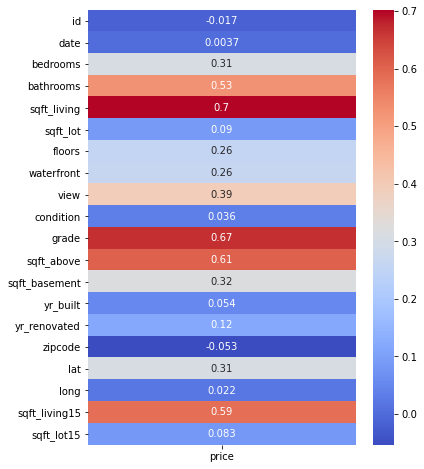

In [108]:
# Creates a seaborn heatmap that shows the correlation between the dependent variable(price) and the other independent variables
plt.figure(figsize=(6, 8))
sns.heatmap(df.corr()[[column for column in df.columns if column== 'price']].drop(['price']), annot=True, cmap='coolwarm')
plt.show()

**The most impactful features to the house price are square footage of the home(sqft_living), overall grade given to the housing unit, based on King County grading system(grade), square footage of the house apart from the basement(sqft_above) and The square footage of interior housing living space for the nearest 15 neighbors(sqft_living15)**

#### FEATURE CLEANING FOR MODELLING

In [109]:
feature_df = df[['sqft_above', 'sqft_living', 'sqft_living15', 'grade', 'price', 'bathrooms', 'bedrooms']]

<Figure size 864x576 with 0 Axes>

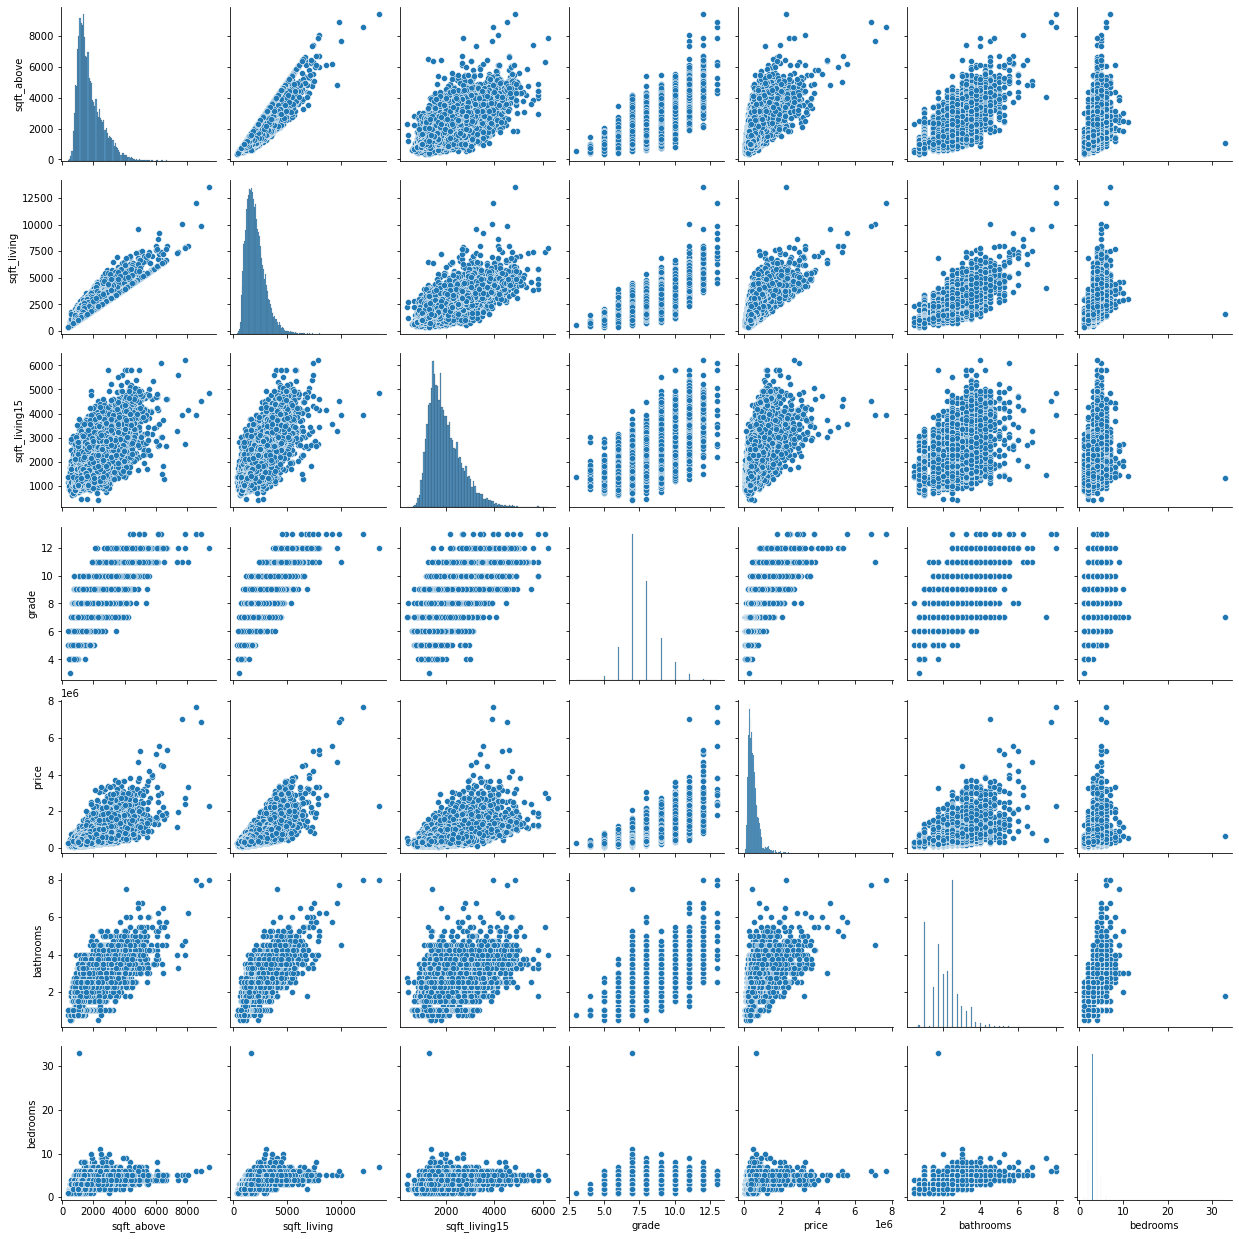

In [110]:
plt.figure(figsize=(12,8))
sns.pairplot(feature_df)
plt.show()

##### Check for outliers in the feature columns

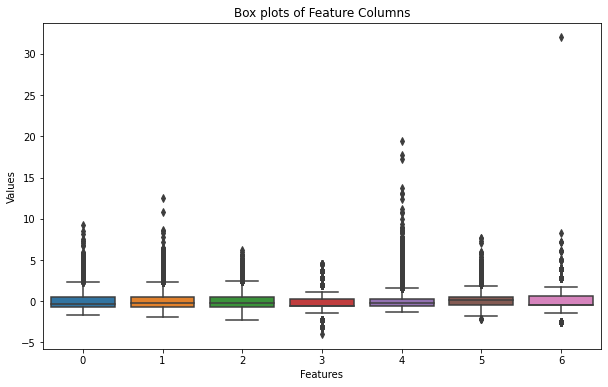

In [111]:
# scale the columns for better visualization using boxplot
scaler = StandardScaler()
scaled_features = scaler.fit_transform(feature_df)
plt.figure(figsize=(10, 6))
# boxplot for the featured columns to visualize outliers
sns.boxplot(data=scaled_features)
plt.title('Box plots of Feature Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

All the columns have outliers. Since this will impact the model negatively, the cell below eliminates the outliers from the featured dataframe.

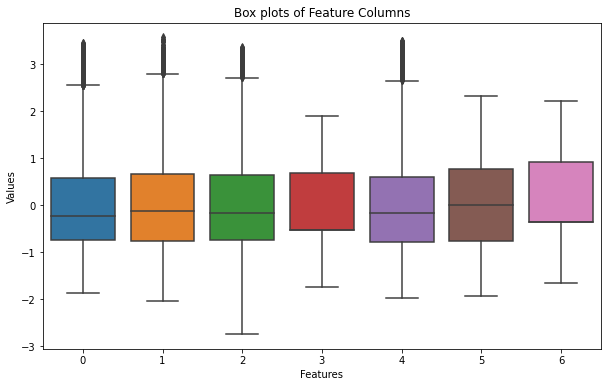

In [112]:
# Calculate IQR for feature columns
Q1 = feature_df.quantile(0.25)
Q3 = feature_df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((feature_df < lower_bound) | (feature_df > upper_bound)).any(axis=1)

# Drop indices of outliers
outlier_indices = feature_df.index[outliers]
feature_df = feature_df.drop(outlier_indices)

# Visualize features without outliers
plt.figure(figsize=(10,6))
sns.boxplot(data= scaler.fit_transform(feature_df))
plt.title('Box plots of Feature Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [113]:
feature_df.shape

(18607, 7)

##### Check for duplicates

In [114]:
# Check for duplicated rowsb
feature_df.duplicated().sum()

31

There are two duplicate rows, these are deleted in the cell below.

In [115]:
# Drop the two duplicates
feature_df.drop_duplicates(inplace=True)
feature_df.duplicated().sum()

0

Check feature colinearity using a correlation heatmap for better selection

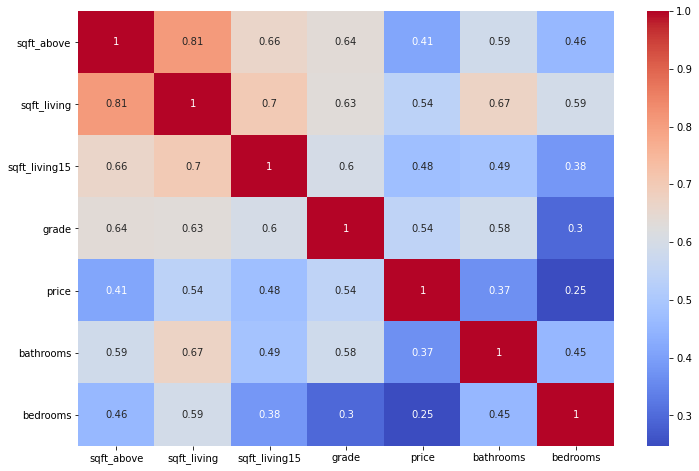

In [116]:
plt.figure(figsize=(12,8))
sns.heatmap(feature_df.corr(), annot=True, cmap='coolwarm')
plt.show()


Sqft_living and sqft_above have a high correlation score indicating a high collinearity. Drop sqft_living for the feature list for better model with low collinearity.

## Data Analysis

#### Analysis 1: Explore the Relationship Between the Square Foot Living Area and Housing Prices:

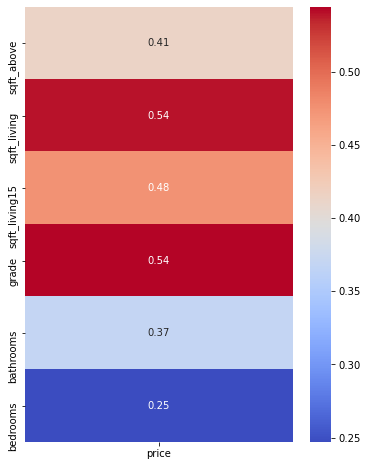

In [117]:
# Creates a seaborn heatmap that shows the correlation between the dependent variable(price) and the other independent variables
plt.figure(figsize=(6, 8))
sns.heatmap(feature_df.corr()[[column for column in df.columns if column== 'price']].drop(['price']), annot=True, cmap='coolwarm')
plt.show()

<Figure size 432x216 with 0 Axes>

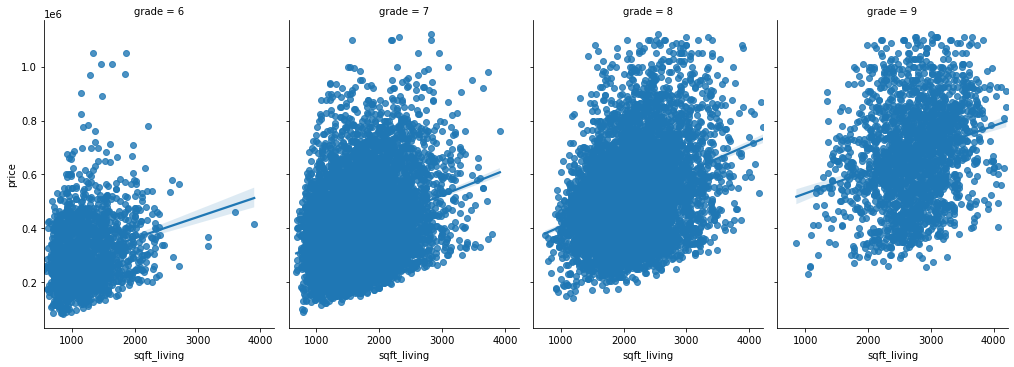

In [118]:
filtered_grade = df[df['grade'].between(6,9)]
plt.figure(figsize=(6,3))
sns.lmplot(data=feature_df, x='sqft_living', y='price', aspect=0.7, col='grade')
plt.show()

**Observation:**

 In the heatmap above of the selected features against the dependent variable(`price`), square footage of the home(`sqft_living`) has the highest correlation to the house price (`0.54`). This indicates that square footage area of the home has a very high co-efficient to the price of the house.

 The regression plot above confirms this conclusion by showing that as the square footage of the home increases so does the price of the home across different grades of houses.

#### Analysis 2: Assess the impact of house rennovations to the house price

In [119]:
# Add a new column 'renovated' to show if a house is renovated or not.
df['renovated'] = df['yr_renovated'].apply(lambda x:1 if x > 0 else 0)
df['renovated'].value_counts()

0    20853
1      744
Name: renovated, dtype: int64

- A regression plot that shows the impact of house renovations on the dependent variable price, while controlling the other independent variables

<Figure size 432x216 with 0 Axes>

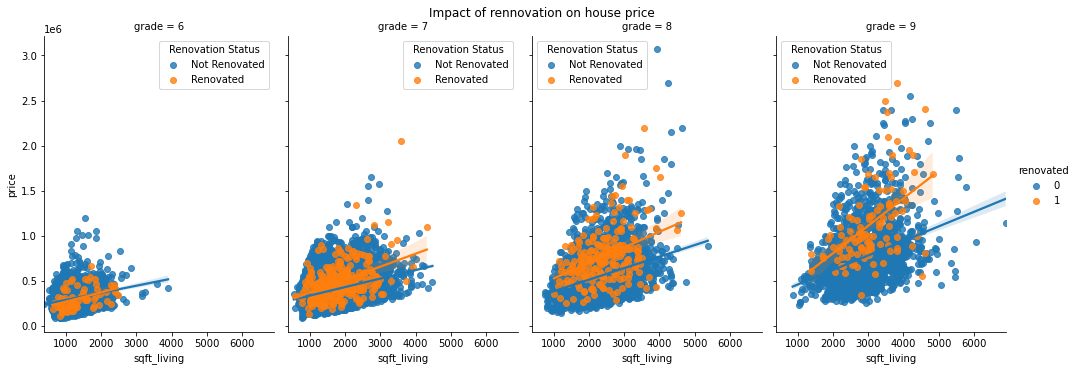

In [120]:
filtered_grade = df[df['grade'].between(6,9)]
plt.figure(figsize=(6,3))
g = sns.lmplot(data=filtered_grade, x='sqft_living', y='price', hue='renovated', aspect=0.7, col='grade')
# Customize the legends (optional)
for ax in g.axes.flat:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['Not Renovated', 'Renovated'], title='Renovation Status')

# Set plot title

g.fig.suptitle('Impact of rennovation on house price')
plt.subplots_adjust(top=0.9)  # Adjust the top to fit the title
plt.show()

**Observation:**

The Seaborn Implot shows a clear price increase in houses that have been rennovated in comparison to houses without rennovations. The Implot illustrates a linear regression model and also takes into account the other independent variables with a high correlation to price(`grade` and `square foot living space`) 

## Modelling
***
The following were the steps taken to come up with the model.

### Steps taken while modelling 
1. Start with the data with outliers and create the baseline model.
2. Add one predictor (independent) variable.
3. Check the performance.
4. Add a categorical variable.
5. Repeat steps 2 - 4 until adequate performance is reached.
6. Repeat these steps for the data without outliers and choose the best model.



### I. First Iteration (Base model)

In [121]:
# find the correlation matrix of the data
to_drop = [
'date',
'sqft_above',
'sqft_basement',
'yr_renovated',
'zipcode',
'lat',
'long',
'sqft_living15',
'sqft_lot15',
]

house_data_df = df.drop(columns=to_drop)
def highest_corr(df, resp_var, to_drop=[]):
    """finds highest corr
    Parameters:
    -----------
    df:
        DataFrame
    resp_var:
        Response variable
    to_drop:
        Columns to drop before finding the correlation matrix
    """
    df = df.drop(columns=to_drop)
    data_corr = df.corr()[resp_var]
    del data_corr[resp_var]

    max_corr = max(data_corr.values)
    print(data_corr, "\n")
    
    for k, v in data_corr.items():
        if v == max_corr:
            print('highest correlation: ', {k : v})

# highest correlation
highest_corr(house_data_df, 'price')

id            -0.016772
bedrooms       0.308787
bathrooms      0.525906
sqft_living    0.701917
sqft_lot       0.089876
floors         0.256804
waterfront     0.264306
view           0.393497
condition      0.036056
grade          0.667951
yr_built       0.053953
renovated      0.117543
Name: price, dtype: float64 

highest correlation:  {'sqft_living': 0.7019173021377597}


From the above result, **sqft_living** (which represents the square foot of living area) has the highest correlation with the price (0.7044283177851761), and is perfect for the baseline model, which is a simple linear regression.

> $$ \hat{y} = \hat{\beta_0} + \hat{\beta_1} x $$\
> Where: \
> $\hat{y}$ is `price`, the dependent (endogenous) variable, and \
> $x$ is `sqft_living`, the independent (exogenous) variable. 

When we fit our model, we are looking for $\hat{\beta_1}$ (the slope) and $\hat{\beta_0}$ (the intercept).

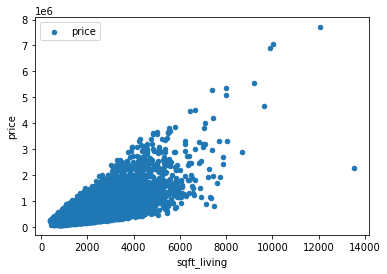

In [122]:
house_data_df.plot.scatter(x="sqft_living", y="price", label="price");

In [123]:
from statsmodels.api import OLS
import statsmodels.api as sm

# construct the exogenous and endogenous variables 
# i.e dependent (price) and independent variables (sqft_living)
y = house_data_df['price']
X_baseline = house_data_df[['sqft_living']]

In [124]:
# construct the baseline model
baseline_model = sm.OLS(endog=y, exog=sm.add_constant(X_baseline))
baseline_results = sm.OLS(endog=y, exog=sm.add_constant(X_baseline)).fit()
baseline_results_summary = baseline_results.summary()

In [125]:
# The summary of the model
print(baseline_results_summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        01:38:24   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

### Interpretation:

### Simple Linear Regression Results

Looking at the summary above, we can see that the regression line we found was

$$ \hat{price} = -48,600 +  283.4016sqft\_living $$

* The model **is statistically significant** overall, with an F-statistic p-value well below 0.05
* The model explains about 49.6% of the variance in price.
    - indicating that approximately **49.6% of the variance in house prices is explained by the square footage of living space ("sqft_living").**
* The model coefficients (`const` and `sqft_living`) are both statistically significant, with t-statistic p-values well below 0.05
* If the sqft_living is $0ft^2$, we would expect price to be about $\$-48,600$
* For each increase of 1 square foot of living area, we see an associated increase in price of about $\$283.4016$


### Simple Linear Regression Visualization

We'll also plot the actual vs. predicted values:

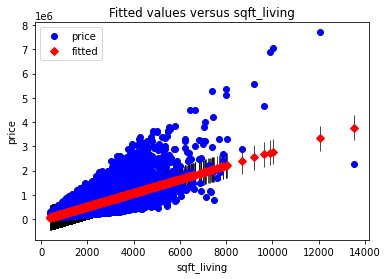

In [126]:
sm.graphics.plot_fit(baseline_results, "sqft_living")
plt.show()

The regression line:

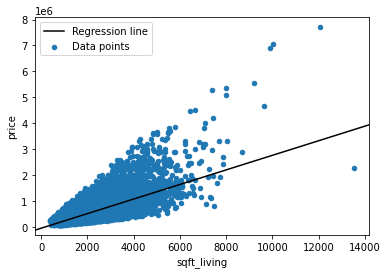

In [127]:
fig, ax = plt.subplots()
house_data_df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend();

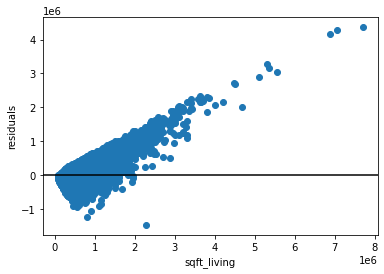

In [128]:
fig, ax = plt.subplots()

ax.scatter(house_data_df["price"], baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

### II. Second iteration

### Adding Another Independent Variable

Now, we expand from our simple linear regression to a multiple linear regression, in bid to improve the overall model performance. Let's try find the next highly correlated variable to price after sqft_living to use in our next iteration.

But before that, we create a python **class** to avoid unnecessary repetitions of code so as to make the model iterations efficient and readable:


In [129]:
class RegressionAnalysis:
    """Regression class"""
    def __init__(self, df, y, X):
        """
        constructor function
        parameters:
        -----------
        df(pandas.DataFrame):
            DataFrame containing our data
        y (pandas.Series):
            endogenous (dependent) variable
        X (pandas.DataFrame):
            exogenous (independent) variable(s)
        """
        self.df = df
        self.X = X
        self.y = y
        
        self.model = sm.OLS(endog=y, exog=sm.add_constant(X))
        self.results = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()
    
    def summary(self):
        """returns model summary"""
        return self.results.summary()
    
    def plot_fit(self, var=None):
        """Plot fit against one regressor."""
        if not var:
            var = self.X.columns[0]
        sm.graphics.plot_fit(self.results, var)
        plt.show()
        
    def plot_partial_reg(self, figsize=(15,8)):
        """Plot partial regression for a set of regressors."""
        fig = plt.figure(figsize=figsize)
        sm.graphics.plot_partregress_grid(self.results, exog_idx=list(self.X.columns), fig=fig)
        plt.tight_layout()
        plt.show()
    
    def plot_ccpr(self):
        """Generate CCPR plots against a set of regressors, plot in a grid."""
        fig = plt.figure(figsize=(15,5))
        sm.graphics.plot_ccpr_grid(self.results, exog_idx=list(self.X.columns), grid=(1,2), fig=fig)
        plt.tight_layout()
        plt.show()

In [130]:
# next highly correlated variable
highest_corr(house_data_df, 'price', ['sqft_living'])

id           -0.016772
bedrooms      0.308787
bathrooms     0.525906
sqft_lot      0.089876
floors        0.256804
waterfront    0.264306
view          0.393497
condition     0.036056
grade         0.667951
yr_built      0.053953
renovated     0.117543
Name: price, dtype: float64 

highest correlation:  {'grade': 0.6679507713877846}


It looks like the number of `bathrooms` is the next most strongly _positively_ correlated predictor, so let's use that.

In [131]:
indep_vars = ['sqft_living', 'bathrooms']
X_second = house_data_df[indep_vars]
X_second.head()

,sqft_living,bathrooms
0,1180,1.00
1,2570,2.25
2,770,1.00
3,1960,3.00
4,1680,2.00


In [132]:
# check bathroom values before analysis
house_data_df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

Since the number of bathrooms should be discrete numerial value (i.e. we cannot have 2.75 bathrooms), we have to floor the values to a discrete value before any sort of analysis on the variable.

In [133]:
house_data_df['bathrooms'] = house_data_df['bathrooms'].apply(int)
house_data_df['bathrooms'].apply(int).unique()

array([1, 2, 3, 4, 0, 5, 6, 8, 7], dtype=int64)

In [134]:
# reselect the variables
indep_vars = ['sqft_living', 'bathrooms']
X_second = house_data_df[indep_vars]

second_iteration = RegressionAnalysis(house_data_df, y, X_second)

# let's see the summary
print(second_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.052e+04
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        01:38:30   Log-Likelihood:            -3.0005e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.566e+04   4836.919    -11.507      

### Interpretation:

### Second Iteration Regression Results

Looking at the summary above, we can see that the regression line we found was

$$ \hat{price} = -59,890 + 272.7382sqft\_living + 19,120bathrooms$$

* The model **is statistically significant** overall, with an **F-statistic p-value** well below 0.05
* The model exhibits an **R-squared value of 49.7%**:
    - indicating that approximately **49.7% of the variance in house prices is explained by the square footage of living space       ("sqft_living") and the number of bathrooms in the houses**
    - slight improvement of 0.1%.
* The model coefficients (`const`, `sqft_living` and `bathrooms`) are statistically significant, with t-statistic p-values well below 0.05
* For each increase of 1 square foot of living area, we see an associated increase in price of about $\$272.7382$
    - this here is an decrease of $-10.66$ from the last model, which means that number of bathrooms was not meaningfully confounding in the relationship between sqft_living and price.
* For each increase of 1 bathroom, we see an associated decrease in price of about $\$19,120$

* The model predicts a price of $\$-59,890$ when `sqft_living` and number of `bathrooms` are 0. 

### Second Iteration Regression Visualization

#### i) Model Fit

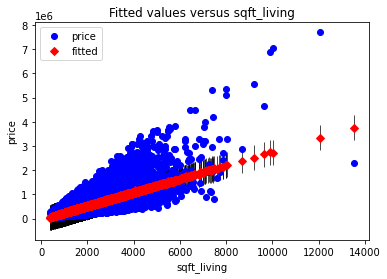

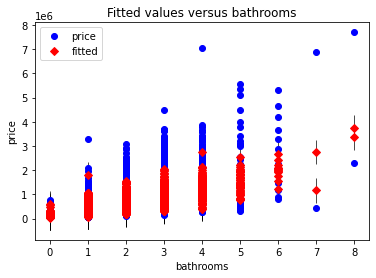

In [135]:
# plot model fit for sqft_living and bathrooms
second_iteration.plot_fit('sqft_living')
second_iteration.plot_fit('bathrooms')

From the above model fit plot of the bathrooms variables appears a bit different from the sqft_living due to it's discrete nature.

#### ii.) Partial Regression Plot

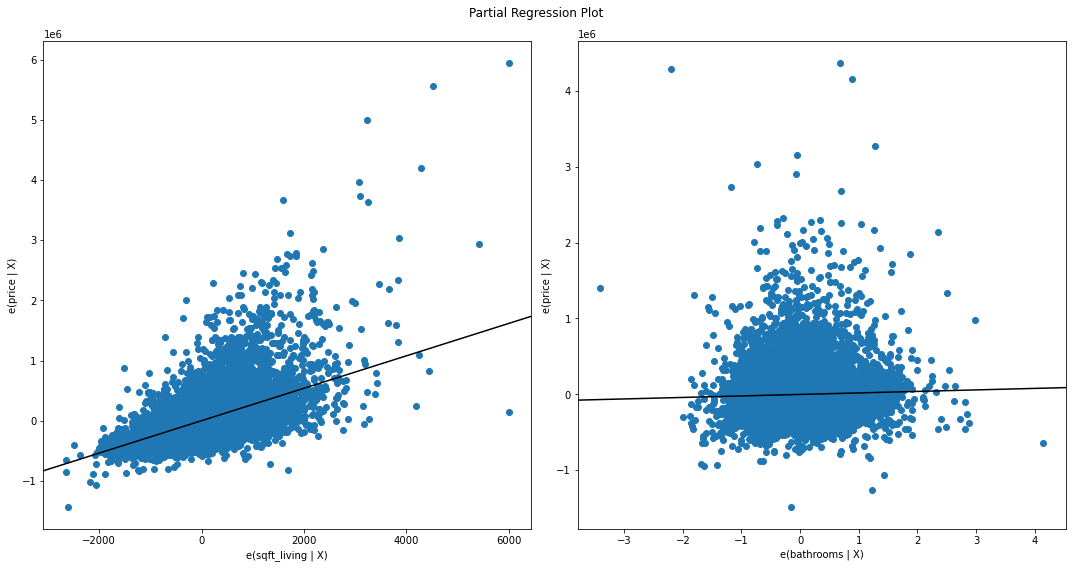

In [136]:
# plot partial regression plot
second_iteration.plot_partial_reg()

This plot explains the unique contribution of each of the independent variables.

- From left:
    - the `sqft_living`  regression plot shows a linear relationship with a non-zero slope, and that means that it is beneficial to add *sqft_living* to the model, vs. having a model without *sqft_living* (i.e. a model with just an intercept and *bathrooms*)
    - The partial regression plot for `bathrooms` is similarly showing the marginal contribution of `bathrooms` compared to a model with just *sqft_living*, albeit, a small one (seen by the near zero slope of regression line).

A reasonable conclusion to reach, looking at these plots, is that both predictors are useful and should be included in the model (given the slight increase of the $R^2$ value), **BUT** the improvement is very little and this justifies the next model iteration.

### iii.  component and component-plus-residual plot

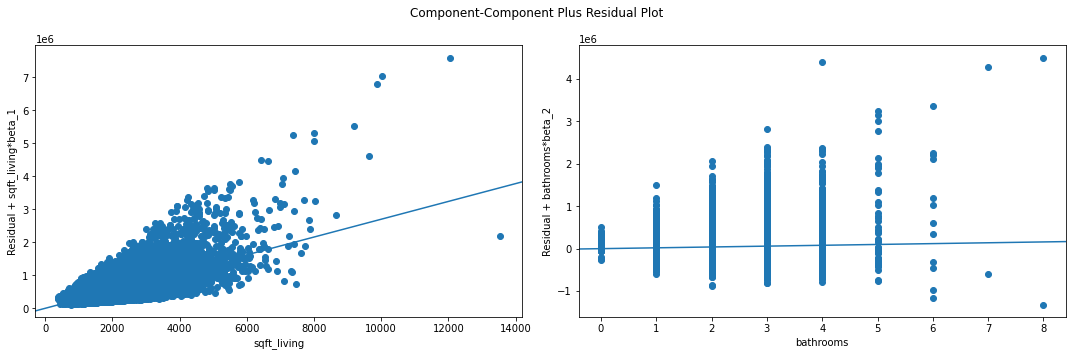

In [137]:
second_iteration.plot_ccpr()

### III. Third iteration
### Adding all features

Given the small improvement shown in the last iteration, we switch gears on this iteration and add all other independent variables and then check the performance. If the performance does not improve significantly or we see some redundancy, we choose a variable to drop and check the performance again. If the performance is positively impactly, we go to the next step.

In [138]:
# evaluate the correlations
highest_corr(house_data_df, 'price', ['sqft_living', 'bathrooms', 'id'])

bedrooms      0.308787
sqft_lot      0.089876
floors        0.256804
waterfront    0.264306
view          0.393497
condition     0.036056
grade         0.667951
yr_built      0.053953
renovated     0.117543
Name: price, dtype: float64 

highest correlation:  {'grade': 0.6679507713877846}


The number of floors should be discrete values so we floor the values to discrete values, before adding them to our model for analysis.

In [139]:
# we see the floors are floats, which doesn't make sense
house_data_df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [140]:
# we floor (ignore what comes after the decimal) the values 
house_data_df['floors'] = house_data_df['floors'].map(int)

In [141]:
# 'floor' is all good now
house_data_df['floors'].unique()

array([1, 2, 3], dtype=int64)

In [142]:
X_all = house_data_df[['sqft_living', 'bathrooms', 'bedrooms', 'floors', 'sqft_lot', 'yr_built']]

third_iteration = RegressionAnalysis(house_data_df, y, X_all)

print(third_iteration.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     4525.
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        01:38:37   Log-Likelihood:            -2.9860e+05
No. Observations:               21597   AIC:                         5.972e+05
Df Residuals:                   21590   BIC:                         5.973e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.527e+06   1.37e+05     47.637      

### Interpretation:

### Third Iteration Regression Results

Looking at the summary above, we can see that the regression line we found was



$$\hat{price} = 6,577,000 + 311.3285 \times \text{sqft_living} + 64,520 \times \text{bathrooms} - 67,230 \times \text{bedrooms} + 55,900 \times \text{floors} - 0.3350 \times \text{sqft_lot} - 3,371.6483 \times \text{yr_built}$$

* The model **is statistically significant** overall, with an **F-statistic p-value** well below 0.05.
* The model exhibits an **R-squared value of 56.1%** of the variance in price.
    - Indicating that approximately **56.1% of the variance in house prices is explained by the model in this iteration and its predictor variables.**
    - An overall improvement of 6.4% from the last model.
* The model coefficients are statistically significant, with t-statistic p-values well below 0.05.
* For each increase of 1 square foot of living area, we see an associated increase in price of about $311.33$.
    - This increase from the previous model ($+38.89$) suggests that the number of bathrooms was confounding the relationship of the other variables.
* For each increase of 1 bedroom, we see an associated decrease in price of about $-67,230$.
* For each increase of 1 floor, we see an associated increase in price of about $55,900$.
* For each increase of 1 square foot of the lot, we see an associated decrease in price of about $-0.3350$.
* For each increase of 1 year, we see an associated decrease in price of about $-3,371.65$.

 ### Model with All Features Visualization
 
 #### i) Plot fits

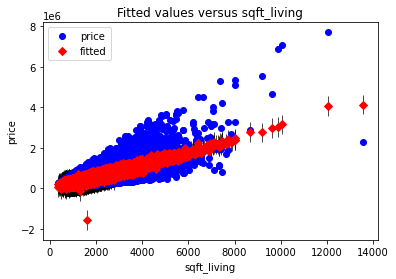

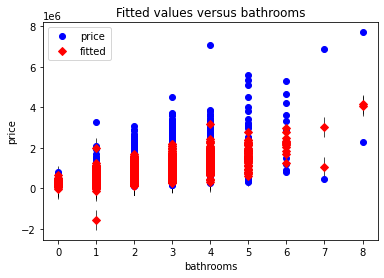

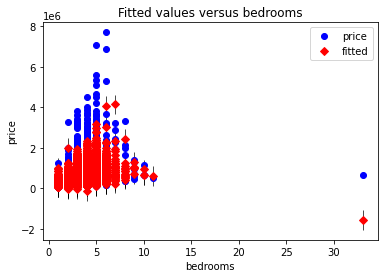

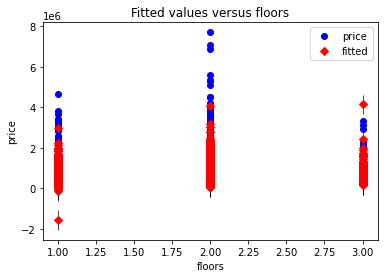

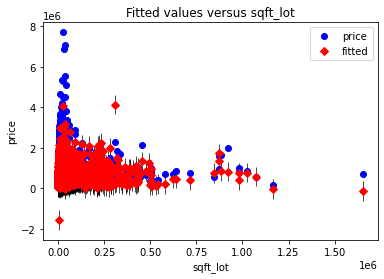

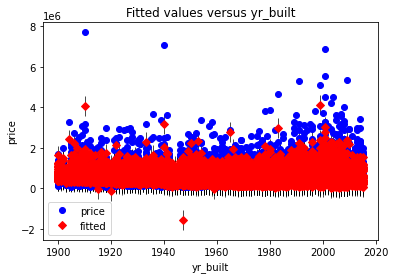

In [143]:
for var in X_all.columns:
    third_iteration.plot_fit(var)

 #### ii) Partial regression plot
 
 We use a partial regression plot to display the contribution of each feature in the performance.

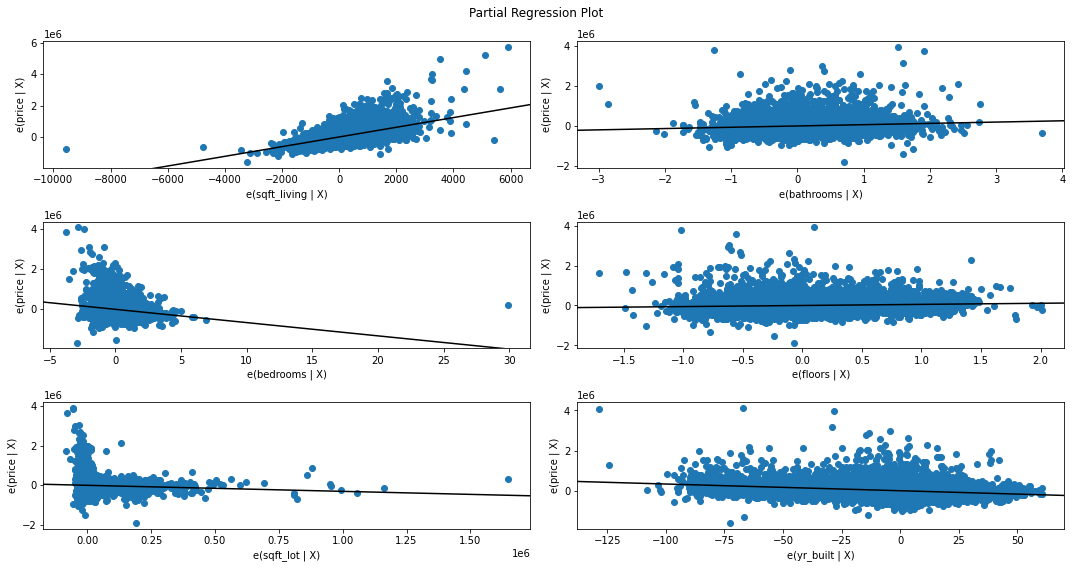

In [144]:
third_iteration.plot_partial_reg()

From the above partial regression plots we see that for some variables like `floors` and `sqft_lot` have slopes of near zero, meaning they do not contribute that much to the model.

But we retain them because they keep the performance high while still having a low p-value, way below our $\alpha$ of 0.05.

From here the model is at it's optimum state given all the predictors, now we add a categorical variable to it.

### Add a categorical variable


We add atleast one categorical value from our dataset in the model. There are 4 categorical variables in our dataset, namely:
- `waterfront`
- `view`
- `condition`
- `grade`

Let's see their bar graphs below:

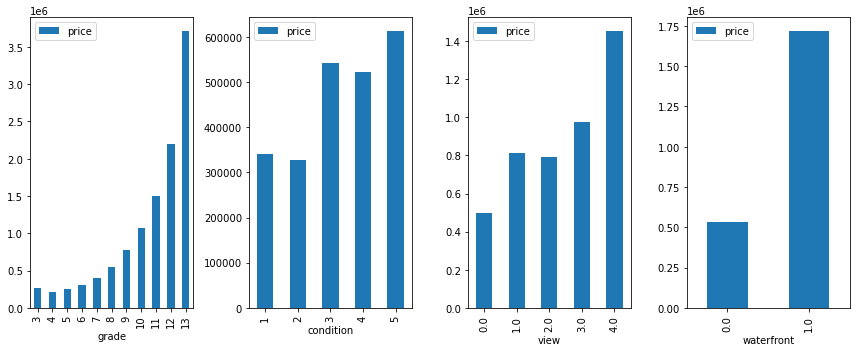

In [146]:
# Lets see the bar graphs of the categorical features

categorical_features = house_data_df[['grade', 'condition', 'view', 'waterfront']].columns
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(12,5))

for index, feature in enumerate(categorical_features):
    house_data_df.groupby(feature).mean().plot.bar(
        y="price", ax=axes[index])
plt.tight_layout()

We choose a categorical predictor that will be interpretable in our model below. We go with `view`, as this categorizes the condition of the house from **NONE** to **EXCELLENT**. 

Since typically for categorical features the data type is a `string`, we have to encode it numerically to allow for regression modelling. 

So we create dummy variables (0's and 1's) representing True or False  (**One-Hot Encoding**):

In [147]:
# select all needed features
X_all = house_data_df[['sqft_living', 'bathrooms', 'bedrooms', 'floors', 'sqft_lot', 'yr_built', 'view']]

# create the dummy variables
X_with_categ = pd.get_dummies(X_all, columns=["view"], dtype=int)

X_with_categ.head()

,sqft_living,bathrooms,bedrooms,floors,sqft_lot,yr_built,view_0.0,view_1.0,view_2.0,view_3.0,view_4.0
0,1180,1,3,1,5650,1955,1,0,0,0,0
1,2570,2,3,2,7242,1951,1,0,0,0,0
2,770,1,2,1,10000,1933,1,0,0,0,0
3,1960,3,4,1,5000,1965,1,0,0,0,0
4,1680,2,3,1,8080,1987,1,0,0,0,0


To avoid the **Dummy variable Trap** brought by when you can perfectly predict what one variable will be using some combination of the other variables, also known as **Multicollinearity**, we have to drop one of the dummy variables to break the collinearity.

The dummy variable to drop is the `view_NONE`, since it is the lowest category of the views.

This becomes our reference variable.

In [150]:
# drop the dummy variable view_NONE
X_with_categ = X_with_categ.drop(columns='view_0.0')

X_with_categ.head()

,sqft_living,bathrooms,bedrooms,floors,sqft_lot,yr_built,view_1.0,view_2.0,view_3.0,view_4.0
0,1180,1,3,1,5650,1955,0,0,0,0
1,2570,2,3,2,7242,1951,0,0,0,0
2,770,1,2,1,10000,1933,0,0,0,0
3,1960,3,4,1,5000,1965,0,0,0,0
4,1680,2,3,1,8080,1987,0,0,0,0


Now we check the impact of the categorical variable on our model:


In [149]:
# Create new model with the categorical variable (view)
model_with_categ = RegressionAnalysis(house_data_df, y, X_with_categ)

print(model_with_categ.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     3127.
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        01:43:42   Log-Likelihood:            -2.9772e+05
No. Observations:               21597   AIC:                         5.955e+05
Df Residuals:                   21586   BIC:                         5.955e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.023e+06    1.1e+05     45.524      

In [ ]:
params = (dict(model_with_categ.results.params))
params

{'const': 5894483.184484629,
 'sqft_living': 283.1529731421636,
 'bathrooms': 61053.88447506365,
 'bedrooms': -57028.99579869452,
 'floors': 58199.17371256267,
 'sqft_lot': -0.3235921344488202,
 'yr_built': -3020.6392742562716,
 'view_AVERAGE': 84639.9814288361,
 'view_EXCELLENT': 534425.989702586,
 'view_FAIR': 126599.94072644773,
 'view_GOOD': 162932.45880673744}

### Final Iteration Regression Results:

Looking at the summary above, we can see that the regression line we found was

$$ \hat{price} = 5,894,000+ (283.1530 * sqft\_living) + (61053.884 * bathrooms) - (57028.996 * bedrooms) + (58199.1737 * floors) - (0.32359* sqft\_lot) - (3020.639 * yr\_built) + view\_COEFF.*view\_TYPE$$


> **NB**: Due to the categorical nature of the `view` variable, the **view_COEFF.** and **view_TYPE** above are placeholders for the regression coefficients for the view types, \
> i.e 
>
> | Variable (view_TYPE)          | Coefficient (view\_COEFF.) |
> |--------------------|-------------|
> | **view_AVERAGE**       |84639.9814     |
> | **view_EXCELLENT**     |534425.9897    |
> | **view_FAIR**          |126599.9407    |
> | **view_GOOD**          |162932.4588    |
>
>This because a house only has one view quality so the model requires one view type to work correctly.

#### Model Interpretation: 

* The model **is statistically significant** overall, with an **F-statistic p-value** well below 0.05
* The model exhibits an **R-squared value of 59.5%** of the variance in price.
    - indicating that approximately **59.5% of the variance in house prices is explained by the model in this iteration and its  predictor variables**
    - An overall improvement of +3.4% from the last model.
* The model coefficients are statistically significant, with t-statistic p-values well below 0.05

* For each increase of 1 square foot of living area, we see an associated increase in price of about $\$283.1530 $
* For each increase of 1 bathroom, we see an associated increase in price of about $\$+61,053.88$
* For each increase of 1 bedroom, we see an associated decrease in price of about $\$-57,029.00$
* For each increase of 1 floor, we see an associated increase in price of about $\$+58,199.17$
* For each increase of 1 Square footage of the lot, we see an associated decrease in price of about $\$-0.32359$
* For each increase of 1 year built, we see an associated decrease in price of about $\$-3020.64$


* The intercept (const) implies that when all other variables are 0, and `view` is `NONE`, the price is  $\$5,894,000$
#### Interpretation of categorical variables:
- Since our **`view_NONE`**is our reference category, we interpret the model summary in reference to it:\
i.e
    - A shift from a house with **no view** to one with a **FAIR view** impacts the price positively by +$\$126,599.94$   
    - A shift from a house with **no view** to one with a **AVERAGE view** impacts the price positively by +$\$84,639.98$
    - A shift from a house with **no view** to one with a **GOOD view** impacts the price positively by +$\$162,932.45$
    - A shift from a house with **no view** to one with a **EXCELLENT view** impacts the price positively by +$\$534,425.99$
    
### Observation:
> A take-away from this interpretation is that houses with an** **AVERAGE** quality of **view** might be under-valued since our understanding seems to indicate that it should be better than one with **FAIR** view (+$\$126,599.94$). More investigation of other features
is needed to understand whether this can be explained by other variables, or if "**AVERAGE**" is actually undervalued.

## CONCLUSION

### Objective 1: 

#### Explore the Relationship Between the Square Foot Living Area and Housing Prices

**Conclusion:**
- **Findings:** The analysis reveals a strong positive correlation (`r = 0.7`) between square foot living area(`sqft_living`) and housing prices(`price`). Larger properties tend to command higher prices in the Kings County housing market.
- **Implications:** This high correlation suggests that the property size significantly influences housing prices, guiding decisions for real estate investors and homebuyers regarding property valuation and market positioning.

### Objective 2:
#### Assess the Impact of Rennovations on the Housing Price.

**Conclusion:**
- **Findings:** The Seaborn Implot shows a clear price increase in houses that have been rennovated in comparison to houses without rennovations. The Implot illustrates a linear regression model and also takes into account the other independent variables with a high correlation to price(`grade` and `square foot living space`) 
- **Implications:** Upgrading the overall grade and quality of your home, such as high-end finishes, better materials, and improved aesthetics, can lead to higher market prices. Focus on renovations that improve the grade of your home.

### Objective 3:
#### Develop a Linear Regression Model to Predict Housing Prices

**Conclusion:**
- **Findings:** The linear regression model, incorporating features `RM`, `LSTAT`, `PTRATIO`, and `INDUS`, achieves an R-squared (`R2`) score of `0.67` on the test set. This indicates that 67% of the variance in housing prices (`MEDV`) can be explained by these predictors.
- **Implications:** Real estate agents and home owners can utilize this model for predicting housing prices based on property characteristics. It supports informed decision-making in real estate investments and pricing strategies.

## Recommendations


1. **Focus on Key Upgrades:**
   - Upgrading the overall grade and quality of your home, such as high-end finishes, better materials, and improved aesthetics, can lead to higher market prices. Focus on renovations that improve the grade of your home.

2. **Enhance Living Space:**
   - Increasing the living space (sqft_living) is a valuable investment. This could include adding extensions or converting unused areas (like basements or attics) into livable spaces.

3. **Have knowledge of Kings County House Grading System :**
   - Incorporate insights from Kings County on how they grade houses. The house grade has a high impact on the price, hence having knowledge of that grading system is important.